In [1]:
import numpy as np
from numpy import genfromtxt

# Data preparation
N=4
data = genfromtxt('data.csv', delimiter=',')

print(data)
print(type(data))

[[6.7 9.1]
 [4.6 5.9]
 [3.5 4.6]
 [5.5 6.7]]
<class 'numpy.ndarray'>


In [2]:
data_x = data[:,0]
data_y = data[:,1]

print(data_x)
print(data_y)

[6.7 4.6 3.5 5.5]
[9.1 5.9 4.6 6.7]


In [9]:
def error(a, b, data_x, data_y):
    # params
    error_sum = 0.0
    
    # sample
    for i in range(N):
        data_x_i = data_x[i]
        data_y_i = data_y[i]
        
        # compute predicted_price
        predicted_price = a*data_x_i + b
        
        # compute error for the ith sample
        error_i = (predicted_price - data_y_i)**2
        error_sum = error_sum + error_i
    
    return error_sum


a = -0.34
b = 0.04
error_value = error(a, b, data_x, data_y)
print(error_value)

289.48942


In [10]:
# gradient
def gradient(func, a, b, data_x, data_y, e=1.0e-4):
    # compute da
    f_a_1 = func(a+e/2, b, data_x, data_y)
    f_a_2 = func(a-e/2, b, data_x, data_y)
    da = (f_a_1 - f_a_2) / e
    
    # compute db
    f_b_1 = func(a, b+e/2, data_x, data_y)
    f_b_2 = func(a, b-e/2, data_x, data_y)
    db = (f_b_1 - f_b_2) / e
    
    return da, db

da, db = gradient(error, a, b, data_x, data_y)
print(da, db)

-354.31000000016866 -66.08400000004622


In [3]:
def func(a, b, data_x, data_y):
    error = 0.0
    for i in range(N):
        # pick sample
        data_xi = data_x[i]
        data_yi = data_y[i]

        # output
        predicted_i = a*data_xi + b
        
        # loss
        error_i = (predicted_i - data_yi)**2
        error   = error + error_i
    
    return error

# đạo hàm trung tâm
def gradient(f, a, b, data_x, data_y, e=1.0e-4):
    # compute da
    f_a_1 = f(a+e/2, b, data_x, data_y)
    f_a_2 = f(a-e/2, b, data_x, data_y)
    da = (f_a_1 - f_a_2) / e
    
    # compute db
    f_b_1 = f(a, b+e/2, data_x, data_y)
    f_b_2 = f(a, b-e/2, data_x, data_y)
    db = (f_b_1 - f_b_2) / e
    
    return da, db

In [8]:
import random

# 1. set (a,b) randomly
a = random.random()
b = 0.0

# params
num_iterations = 200
step = 0.01

# optimize
for _ in range(num_iterations):
    # 2. compute the derivative at (a,b)
    da, db = gradient(func, a, b, data_x, data_y)
    
    # get sign of dx
    sign_a = np.sign(da)
    sign_b = np.sign(db)
        
    # update
    a = a - sign_a*step
    b = b - sign_b*step
    
    # test
    error = func(a, b, data_x, data_y)
            
    print(error, a, b)

110.24313817177949 0.29152457834212764 0.01
107.66737201016716 0.30152457834212765 0.02
105.1222358485548 0.31152457834212766 0.03
102.60772968694246 0.32152457834212766 0.04
100.12385352533012 0.3315245783421277 0.05
97.67060736371779 0.3415245783421277 0.060000000000000005
95.24799120210545 0.3515245783421277 0.07
92.8560050404931 0.3615245783421277 0.08
90.49464887888078 0.3715245783421277 0.09
88.16392271726843 0.3815245783421277 0.09999999999999999
85.86382655565609 0.3915245783421277 0.10999999999999999
83.59436039404376 0.40152457834212774 0.11999999999999998
81.35552423243142 0.41152457834212774 0.12999999999999998
79.14731807081907 0.42152457834212775 0.13999999999999999
76.96974190920675 0.43152457834212776 0.15
74.8227957475944 0.44152457834212777 0.16
72.70647958598207 0.4515245783421278 0.17
70.62079342436974 0.4615245783421278 0.18000000000000002
68.5657372627574 0.4715245783421278 0.19000000000000003
66.54131110114504 0.4815245783421278 0.20000000000000004
64.54751493953

8.879999999999999


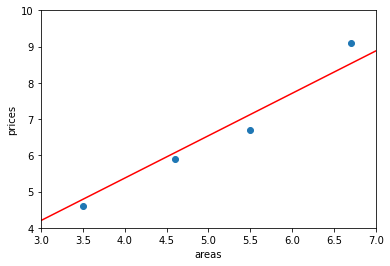

0.5704749999999993

In [11]:
import numpy as np
from numpy import genfromtxt
import matplotlib.pyplot as plt

a = 1.17
b = 0.69

data_x_new = 7
predicted_price = a*data_x_new + b
print(predicted_price)

x = np.arange(3,8)
y = a*x + b

plt.plot(x,y, 'r')
plt.scatter(data_x, data_y)
plt.xlabel('areas')
plt.ylabel('prices')
plt.xlim(3,7)
plt.ylim(4,10)
plt.show()

func(a, b, data_x, data_y)